In [60]:
import numpy as np
from scipy.stats import *
from sympy import *
from IPython.display import Math
from scipy import optimize
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm


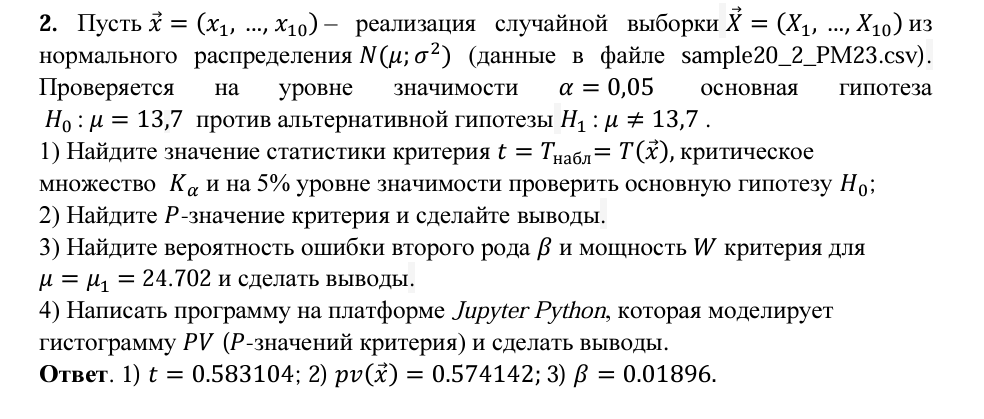

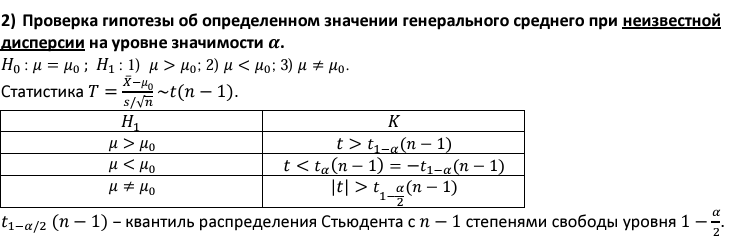

Статистика T: 0.5831039501860182
Критическое множество: (-2.2621571628540993, 2.2621571628540993)
Гипотеза H0 принимается.
p-значение: 0.5741416681136751
Ошибка второго рода (Beta): 0.0075511702534342764
Мощность (W): 0.9924488297465657


100%|██████████| 100000/100000 [00:06<00:00, 16507.09it/s]


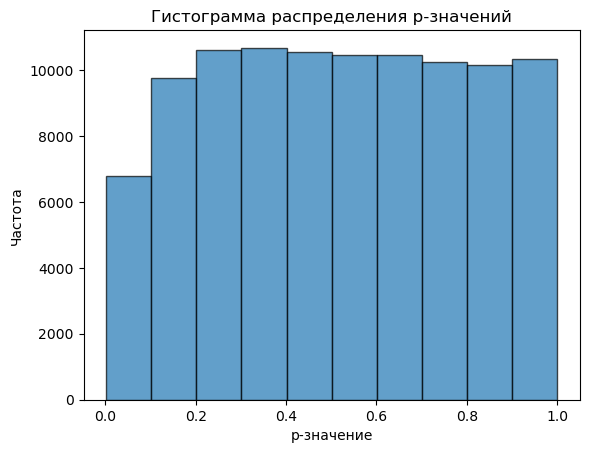

In [61]:
data = pd.read_csv('sample20_2_PM23.csv', header = None, sep = ';', decimal=',')
x = data.values
n = len(x)
alpha = 0.05

mu0 = 13.7 #H0

# Заданные параметры
mu_0 = 13.7
alpha = 0.05

# Вычисление
x_bar = np.mean(x)
s = np.std(x, ddof=1)
t_stat = (x_bar - mu_0) / (s / np.sqrt(n))

# Критические значения
t_critical = t.ppf(1 - alpha / 2, df=n-1)  # Критическое значение для уровня 0.05
K_alpha = (-t_critical, t_critical)

print(f"Статистика T: {t_stat}")
print(f"Критическое множество: {K_alpha}")
print("Гипотеза H0 отвергается." if not (K_alpha[0] <= t_stat <= K_alpha[1]) else "Гипотеза H0 принимается.")


p_value = 2 * (1 - t.cdf(abs(t_stat), df=n-1))
print(f"p-значение: {p_value}")


# Новое значение гипотезы
mu_1 = 24.702

# Параметры для Beta
delta = (mu_1 - mu_0) / (s / np.sqrt(n))
beta = norm.cdf(t_critical - delta) - norm.cdf(-t_critical - delta)
power = 1 - beta

print(f"Ошибка второго рода (Beta): {beta}")
print(f"Мощность (W): {power}")


N = 10**5  # Количество моделирований
p_values = []

for _ in tqdm(range(N)):
    # Генерация случайной выборки
    sample = np.random.normal(loc=mu_0, scale=s, size=n)
    x_bar_sim = np.mean(sample)
    t_stat_sim = (x_bar_sim - mu_0) / (s / np.sqrt(n))
    p_sim = 2 * (1 - t.cdf(abs(t_stat_sim), df=n-1))
    p_values.append(p_sim)

# Гистограмма
plt.hist(p_values, bins=10, edgecolor='black', alpha=0.7)
plt.title("Гистограмма распределения p-значений")
plt.xlabel("p-значение")
plt.ylabel("Частота")
plt.show()


In [73]:
import numpy as np
from scipy.stats import t

def one_rrstr(x,n=0): # округление до n знаков после запятой
    if n == 0:
        return str(x)
    fmt = '{:.'+str(n)+'f}'
    return fmt.format(x).replace('.',',')

text = '1,146; 2,958; -3,325; -0,534; 0,374; 5,293; 0,12; 1,185; 5,148; 5,351; 2,639; 1,47; -1,967; 4,96; 6,057; -0,542; 1,544; -0,243; -1,988; 2,844'
splitter = ';'
locale = 'rus'
# Заданные параметры
mu_0 = 1.10  #H0
alpha = 0.05
# Новое значение гипотезы
mu_1 = 0.91



if locale== 'rus':
    x = np.array(text.replace(',','.').split(splitter)).astype(float)
else:
    x = np.array(text.split(splitter)).astype(float)
    
n = x.size

# Вычисление
x_bar = np.mean(x)
s = np.std(x, ddof=1)
t_stat = (x_bar - mu_0) / (s / np.sqrt(n))

# Критические значения
t_critical = t.ppf(1 - alpha/2, df=n-1)  # Критическое значение для уровня 0.05
K_alpha = (-t_critical, t_critical)

print("Значение статистики критерия = " + one_rrstr(t_stat,3))
print("Граница А критического множества = " + one_rrstr(t_critical,3))
print("Гипотеза H0 отвергается." if not (K_alpha[0] <= t_stat <= K_alpha[1]) else "Гипотеза H0 принимается.")


p_value = 2 * (1 - t.cdf(abs(t_stat), df=n-1))
print("P-значение критерия = " + one_rrstr(p_value,3) )




# Параметры для Beta
delta = (mu_1 - mu_0) / (s / np.sqrt(n))
beta = t.cdf(t_critical - delta, df=n-1) - t.cdf(-t_critical - delta, df=n-1)
power = 1 - beta

print("Мощность критерия = " + one_rrstr(power,3))

Значение статистики критерия = 0,857
Граница А критического множества = 2,093
Гипотеза H0 принимается.
P-значение критерия = 0,402
Мощность критерия = 0,060


In [72]:
import numpy as np
from scipy.stats import t

def one_rrstr(x,n=0): # округление до n знаков после запятой
    if n == 0:
        return str(x)
    fmt = '{:.'+str(n)+'f}'
    return fmt.format(x).replace('.',',')

text = '1,825; 0,35; 1,837; 2,528; -3,712; 6,468; 8,392; 0,079; 5,281; -2,019; 4,69; -0,607; 1,925; 2,688; 1,573; 4,66; 1,273; -0,505; 1,36; 0,403'
splitter = ';'
locale = 'rus'
# Заданные параметры
mu_0 = 1.54  #H0
alpha = 0.05
# Новое значение гипотезы
mu_1 = 1.35



if locale== 'rus':
    x = np.array(text.replace(',','.').split(splitter)).astype(float)
else:
    x = np.array(text.split(splitter)).astype(float)
    
n = x.size

# Вычисление
x_bar = np.mean(x)
s = np.std(x, ddof=1)
t_stat = (x_bar - mu_0) / (s / np.sqrt(n))

# Критические значения
t_critical = t.ppf(1 - alpha/2, df=n-1)  # Критическое значение для уровня 0.05
K_alpha = (-t_critical, t_critical)

print("Значение статистики критерия = " + one_rrstr(t_stat,3))
print("Граница А критического множества = " + one_rrstr(t_critical,3))
print("Гипотеза H0 отвергается." if not (K_alpha[0] <= t_stat <= K_alpha[1]) else "Гипотеза H0 принимается.")


p_value = 2 * (1 - t.cdf(abs(t_stat), df=n-1))
print("P-значение критерия = " + one_rrstr(p_value,3) )




# Параметры для Beta
delta = (mu_1 - mu_0) / (s / np.sqrt(n))
beta = t.cdf(t_critical - delta, df=n-1) - t.cdf(-t_critical - delta, df=n-1)
power = 1 - beta

print("Мощность критерия = " + one_rrstr(power,3))

Значение статистики критерия = 0,595
Граница А критического множества = 2,093
Гипотеза H0 принимается.
P-значение критерия = 0,559
Мощность критерия = 0,059


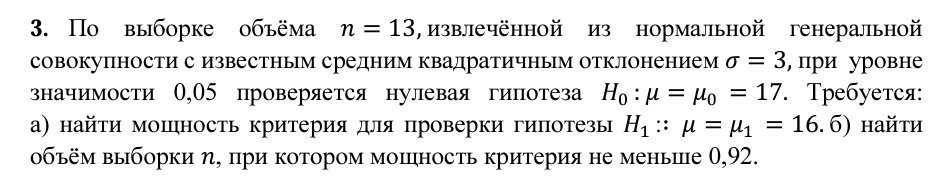

In [65]:
n = 13
sigma = 3
alpha = 0.05
mu_0 = 17
mu_1 = 16

# Критическое значение для уровня значимости
z_crit = norm.ppf(alpha)

# Мощность теста (a)
z_power = z_crit - (mu_1 - mu_0) / (sigma / np.sqrt(n)) 
power = norm.cdf(z_power)

print(f"Мощность теста (W) при n = {n}: {power:.4f}")

# Нахождение объема выборки (b)
required_power = 0.92

def find_sample_size(mu_0, mu_1, sigma, alpha, required_power):
    z_crit = norm.ppf(alpha)

    # Значение z для мощности (1 - W)
    z_required = norm.ppf(required_power)

    # Нахождение объема выборки n
    n_required = (sigma * (z_required - z_crit) / (mu_1 - mu_0))**2
    n_required = np.ceil(n_required) # Округляем до целого числа
    return n_required  

n_required = find_sample_size(mu_0, mu_1, sigma, alpha, required_power)

print(f"Необходимый объем выборки (n): {n_required}")


Мощность теста (W) при n = 13: 0.3289
Необходимый объем выборки (n): 84.0
